In [7]:
import jax.numpy as jnp
import numpy as np
from jax.scipy.stats import norm
from scipy.stats import invgamma
import matplotlib.pyplot as plt

import constants as cs
# import data_generation

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
observation_length = cs.N_SAMPLES
OBSERVATION_NOISE = 1e-2
number_systems = 8

## Observe mu distributions

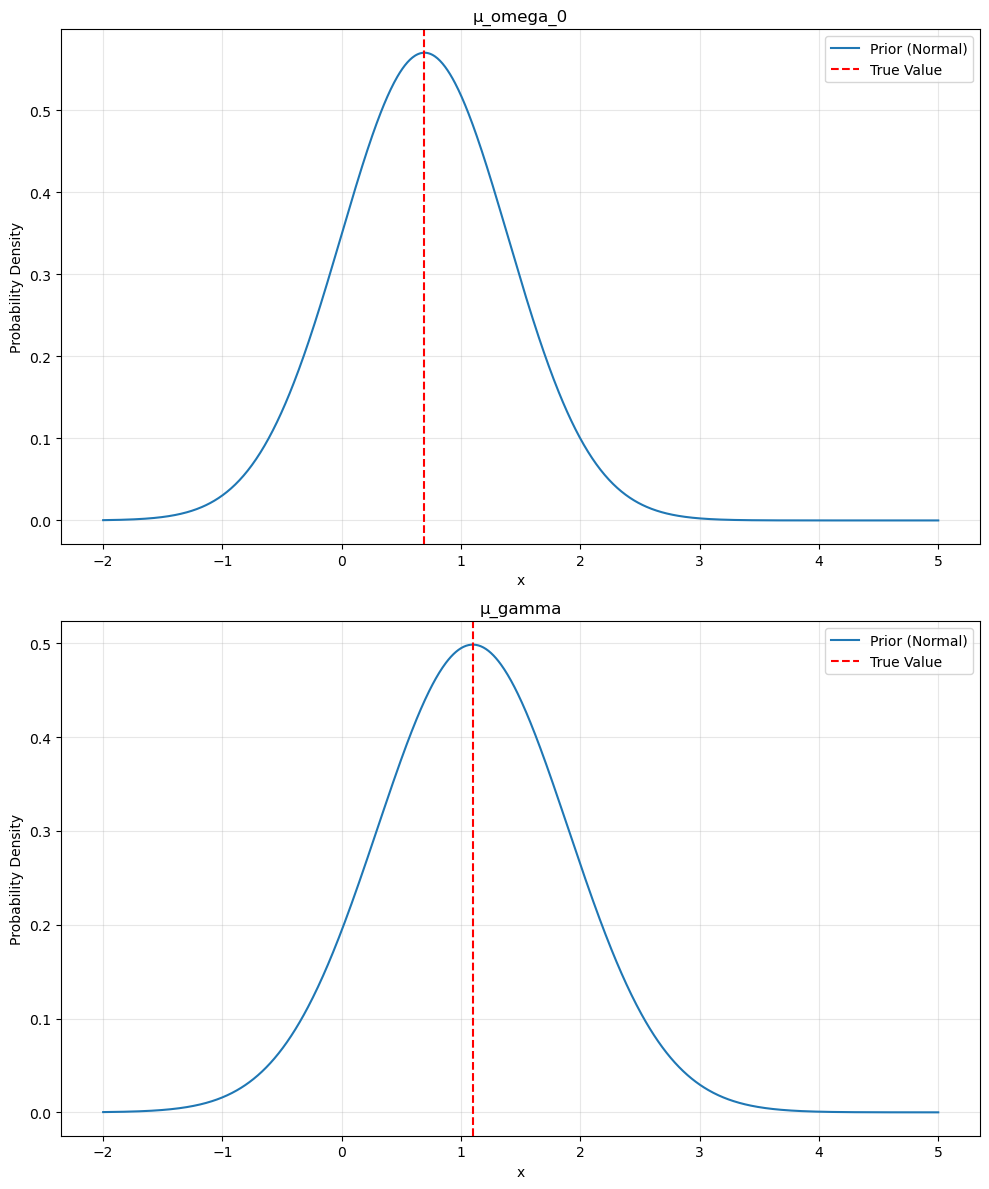

In [10]:
# Create x values for plotting
x = jnp.linspace(-2, 5, 1000)

# Create figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
axes = [ax1, ax2]
labels = ['omega_0', 'gamma']

# Plot each distribution in its own subplot
for ax, mu_prior, sigma_prior, true_value, label in zip(axes, cs.MU_PHI, cs.SIGMA_PHI, cs.MU_TARGET, labels):
    y_prior = norm.pdf(x, loc=mu_prior, scale=sigma_prior)
    ax.plot(x, y_prior, label='Prior (Normal)')
    ax.axvline(x=true_value, color='r', linestyle='--', label='True Value')
    ax.set_title(f'μ_{label}')
    ax.set_xlabel('x')
    ax.set_ylabel('Probability Density')
    ax.grid(True, alpha=0.3)
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Observe tau distributions

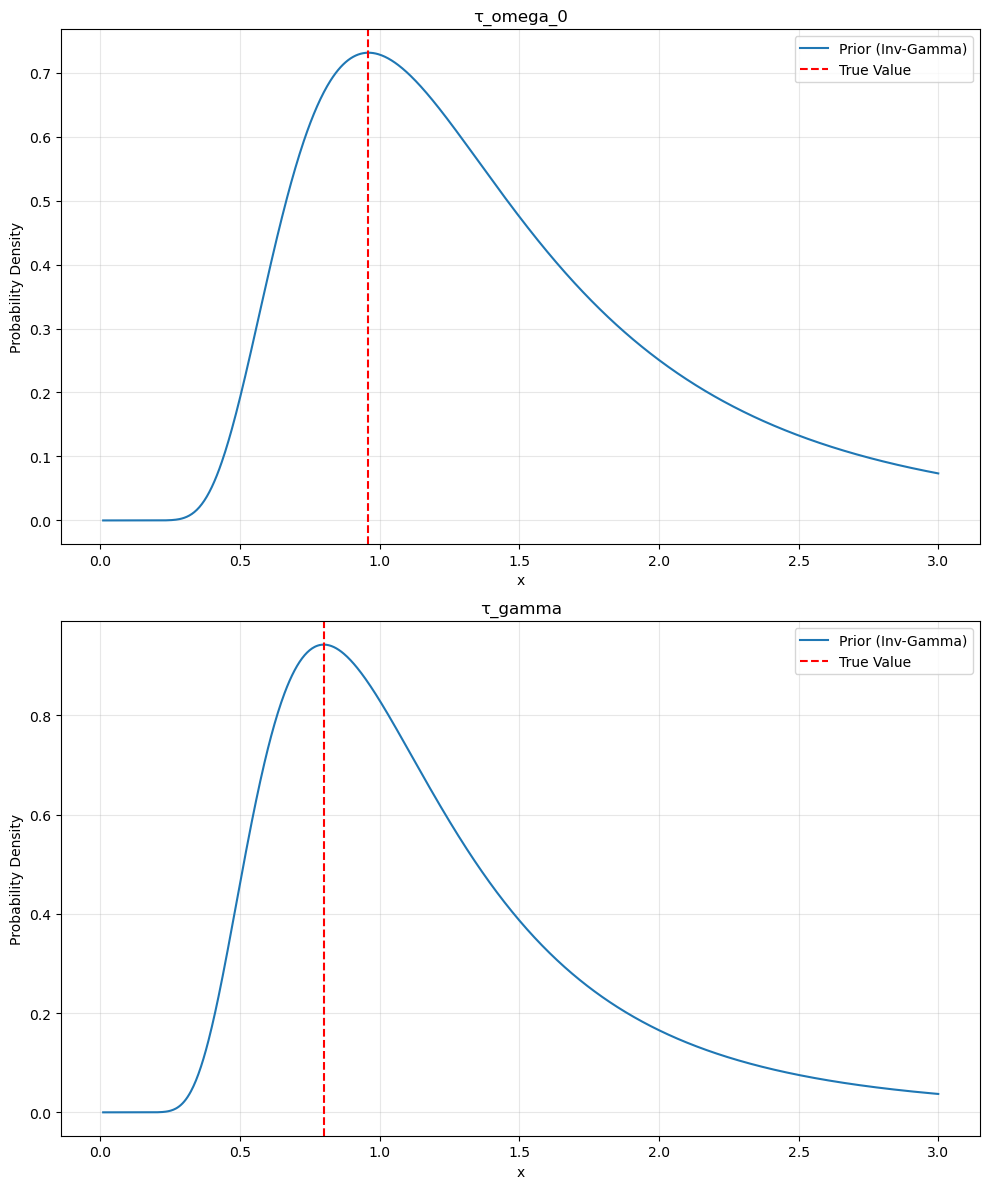

In [11]:
# Create x values for plotting (using numpy since we're using scipy.stats)
x = np.linspace(0.01, 3, 1000)

# Create figure with 3 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
axes = [ax1, ax2]
labels = ['omega_0', 'gamma']

# Plot each distribution in its own subplot
for ax, a, b, true_value, label in zip(axes, cs.A_PHI, cs.B_PHI, cs.TAU_TARGET, labels):
    y_prior = invgamma.pdf(x, a=a, scale=b)
    ax.plot(x, y_prior, label='Prior (Inv-Gamma)')
    ax.axvline(x=true_value, color='r', linestyle='--', label='True Value')
    ax.set_title(f'τ_{label}')
    ax.set_xlabel('x')
    ax.set_ylabel('Probability Density')
    ax.grid(True, alpha=0.3)
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Generate observations

## Sample parameters z_(n) given hyperparameters

## Generate observations y_(n) from parameters z_(n)  

In [12]:
z_example = jnp.log(jnp.array([10.0, 20.0]))
y_test = data_generation.noisy_observations_from_parameters(3, z_example, OBSERVATION_NOISE)
y_test

NameError: name 'data_generation' is not defined

In [ ]:
data_generation.all_sampled_params_concat

Array([ 0.36540878, -0.7256274 ,  2.090436  ,  1.0174242 ,  0.69884956,
        1.8649924 , -1.960983  ,  2.8546095 ], dtype=float32)

In [ ]:
data_generation.target_observations_from_sampled_params

Array([[ 4.12264243e-02,  6.99176863e-02,  6.96312040e-02,
         9.70930159e-02,  1.23135738e-01,  1.34707734e-01,
         1.62063003e-01,  1.94057032e-01,  2.17341140e-01,
         2.22245753e-01,  2.74036914e-01,  2.52608925e-01,
         2.95070678e-01,  3.11775267e-01,  3.41051459e-01,
         3.60823661e-01,  3.72204185e-01,  3.84598792e-01,
         3.94268483e-01,  3.89577478e-01,  4.04160857e-01,
         4.53329593e-01,  4.49086994e-01,  4.68588978e-01,
         4.72852737e-01,  4.84713435e-01,  5.03915727e-01,
         5.07223368e-01,  5.00397623e-01,  5.08321762e-01,
         5.06911933e-01,  5.31138361e-01,  5.32959640e-01,
         5.38601816e-01,  5.38814902e-01,  5.44533968e-01,
         5.54429054e-01,  5.39012194e-01,  5.47691166e-01,
         5.46221673e-01,  5.37904263e-01,  5.37794352e-01,
         5.46505928e-01,  5.48379064e-01,  5.37158847e-01,
         5.26746809e-01,  5.23530841e-01,  5.02787411e-01,
         5.29274642e-01,  5.16973495e-01,  5.03784776e-0

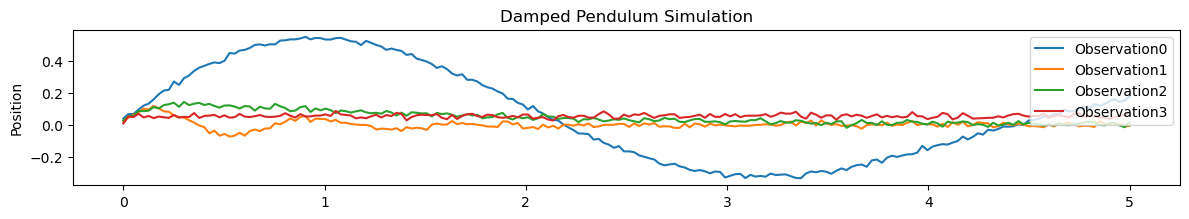

In [ ]:
N = cs.N_SAMPLES
T = cs.T

# Create time array
t = jnp.linspace(0, cs.T, cs.N_SAMPLES)

# Plot results
plt.figure(figsize=(12, 4))
plt.subplot(2, 1, 1)
for i, observation in enumerate(data_generation.target_observations_from_sampled_params):
    plt.plot(t, observation, label=f'Observation{i}')
plt.ylabel('Position')
plt.title('Damped Pendulum Simulation')
plt.legend()
plt.tight_layout()
plt.show()